# LAB 3 Part - A : Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis 

In [3]:
dataset.shape

(30, 2)

In [4]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##  Extracting independent and dependent variables

In [7]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [8]:
print(X.shape)

(30, 1)


In [9]:
print(y.shape)

(30,)


## Splitting the dataset into the Training set and Test set 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [11]:
print(X_train.shape)

(24, 1)


## Training the Simple Linear Regression model on the Training set 

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Getting the final linear regression equation with the values of the coefficients 

In [13]:
print("B1=",regressor.coef_)
print("B0 =",regressor.intercept_)

B1= [9312.57512673]
B0 = 26780.099150628186


## Predicting the Test set results 

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
print(y_test)
print(y_pred)

[ 37731. 122391.  57081.  63218. 116969. 109431.]
[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


## Visualising the Training set results 

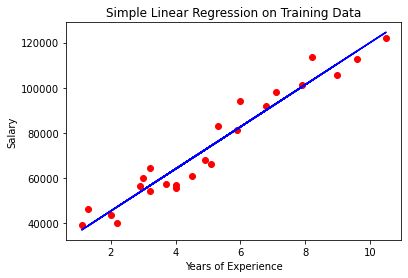

In [16]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
# regressor.predict(x_train)  because it is predicted salaries for x_train
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Visualising the Test set results 

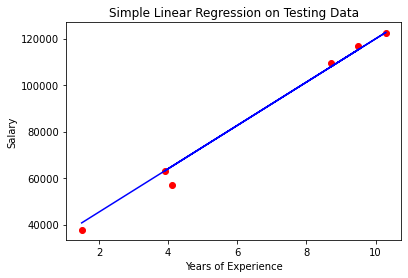

In [17]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
# y_pred  because it is predicted salaries for x_test
plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## Evaluating the performance of the model R-squared and the Goodness-of-Fit

R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

R-squared is the percentage of the dependent variable variation that a linear model explains.

R-squared is always between 0 and 100%:
0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all of the variation in the response variable around its mean.

Usually, the larger the R2, the better the regression model fits your observations. 

RMSE is the square root of the average of the sum of the squares of residuals.


## Finding R^2 score

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.988169515729126